In [86]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 85)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 30)

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import decomposition, cluster
from sklearn import feature_selection, linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [13]:
df = pd.read_csv('/Users/samuelleichman/DS-SF-30/dataset-17-ames-housing.csv')

In [16]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,240,38,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [4]:
df.shape

(2930, 82)

In [30]:
df.dtypes


Order                int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [27]:
df['Overall_Qual'] = df['Overall Qual']

In [31]:
df['Lot_Area'] = df['Lot Area']

In [32]:
df['Year_Built'] = df['Year Built']

In [59]:
df['Lot_Config'] = df['Lot Config']

In [71]:
df['Garage_Area'] = df['Garage Area']

In [72]:
df['MS_Zoning'] = df['MS Zoning']

In [77]:
smf.ols(formula = 'SalePrice ~ Overall_Qual + Lot_Area + Year_Built + Fireplaces + Neighborhood + Garage_Area + MS_Zoning + Lot_Config + Utilities', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     244.2
Date:                Thu, 09 Feb 2017   Prob (F-statistic):               0.00
Time:                        20:08:21   Log-Likelihood:                -34945.
No. Observations:                2929   AIC:                         6.998e+04
Df Residuals:                    2884   BIC:                         7.025e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept               -6.767e+05   1.06e+05     -6.363      0.000     -8.85e+05 -4.68e+05
Neighborhood[T.Blueste] -2.257e+04   1.41e+04     -1.597      0.110     -5.03e+04  5140.660
Neighborhood[T.BrDale]  -8122.5625   1.05e+04     -0.771      0.441     -2.88e+04  1.25e+04
Neighborhood[T.BrkSide]  2.253e+04   8993.190      2.505      0.012      4896.964  4.02e+04
Neighborhood[T.ClearCr]   2.23e+04   9367.992      2.380      0.017      3926.683  4.07e+04
Neighborhood[T.CollgCr]  1.334e+04   7442.851      1.793      0.073     -1250.429  2.79e+04
Neighborhood[T.Crawfor]   4.24e+04   8426.582      5.032      0.000      2.59e+04  5.89e+04
Neighborhood[T.Edwards]  1.182e+04   7946.908      1.487      0.137     -3767.021  2.74e+04
Neighborhood[T.Gilbert]  5823.5494   7644.403      0.762      0.446     -9165.496  2.08e+04
Neighborhood[T.Greens]  -3.158e+04    1.5e+04     -2.102      0.036      -6.1e+04 -2127.471
Neighborhood[T.GrnHill]  1.128e+05   2.73e+04      4.126      0.000      5.92e+04  1.66e+05
Neighborhood[T.IDOTRR]   1.865e+04   9870.676      1.889      0.059      -704.787   3.8e+04
Neighborhood[T.Landmrk]  -1.23e+04   3.85e+04     -0.320      0.749     -8.77e+04  6.31e+04
Neighborhood[T.MeadowV]  1.623e+04   1.02e+04      1.584      0.113     -3857.959  3.63e+04
Neighborhood[T.Mitchel]  9752.9462   8021.333      1.216      0.224     -5975.179  2.55e+04
Neighborhood[T.NAmes]    1.079e+04   7623.058      1.416      0.157     -4156.603  2.57e+04
Neighborhood[T.NPkVill] -1.339e+04   1.06e+04     -1.262      0.207     -3.42e+04  7407.399
Neighborhood[T.NWAmes]   8298.5679   7894.846      1.051      0.293     -7181.543  2.38e+04
Neighborhood[T.NoRidge]  8.596e+04   8399.015     10.234      0.000      6.95e+04  1.02e+05
Neighborhood[T.NridgHt]  6.913e+04   7699.673      8.978      0.000       5.4e+04  8.42e+04
Neighborhood[T.OldTown]  2.228e+04   9124.826      2.441      0.015      4383.505  4.02e+04
Neighborhood[T.SWISU]    1.991e+04   9640.737      2.065      0.039      1003.232  3.88e+04
Neighborhood[T.Sawyer]   8901.8191   8006.737      1.112      0.266     -6797.686  2.46e+04
Neighborhood[T.SawyerW]  9181.0836   7844.901      1.170      0.242     -6201.096  2.46e+04
Neighborhood[T.Somerst]  2.661e+04   9104.146      2.922      0.004      8754.605  4.45e+04
Neighborhood[T.StoneBr]  7.965e+04   8852.883      8.997      0.000      6.23e+04   9.7e+04
Neighborhood[T.Timber]    2.79e+04   8416.412      3.315      0.001      1.14e+04  4.44e+04
Neighborhood[T.Veenker]  3.202e+04   1.05e+04      3.055      0.002      1.15e+04  5.26e+04
MS_Zoning[T.C (all)]    -1.156e+04   2.75e+04     -0.420      0.675     -6.56e+04  4.24e+04
MS_Zoning[T.FV]         -1.566e+04   2.74e+04     -0.572      0.568     -6.94e+04  3.81e+04
MS_Zoning[T.I (all)]    -1.394e+04   4.03e+04  

In [36]:
df[ ['SalePrice', 'Overall_Qual','Lot_Area','Year_Built'] ].corr()

,SalePrice,Overall_Qual,Lot_Area,Year_Built
SalePrice,1.000000,0.799262,0.266549,0.558426
Overall_Qual,0.799262,1.000000,0.097188,0.597027
Lot_Area,0.266549,0.097188,1.000000,0.023258
Year_Built,0.558426,0.597027,0.023258,1.000000


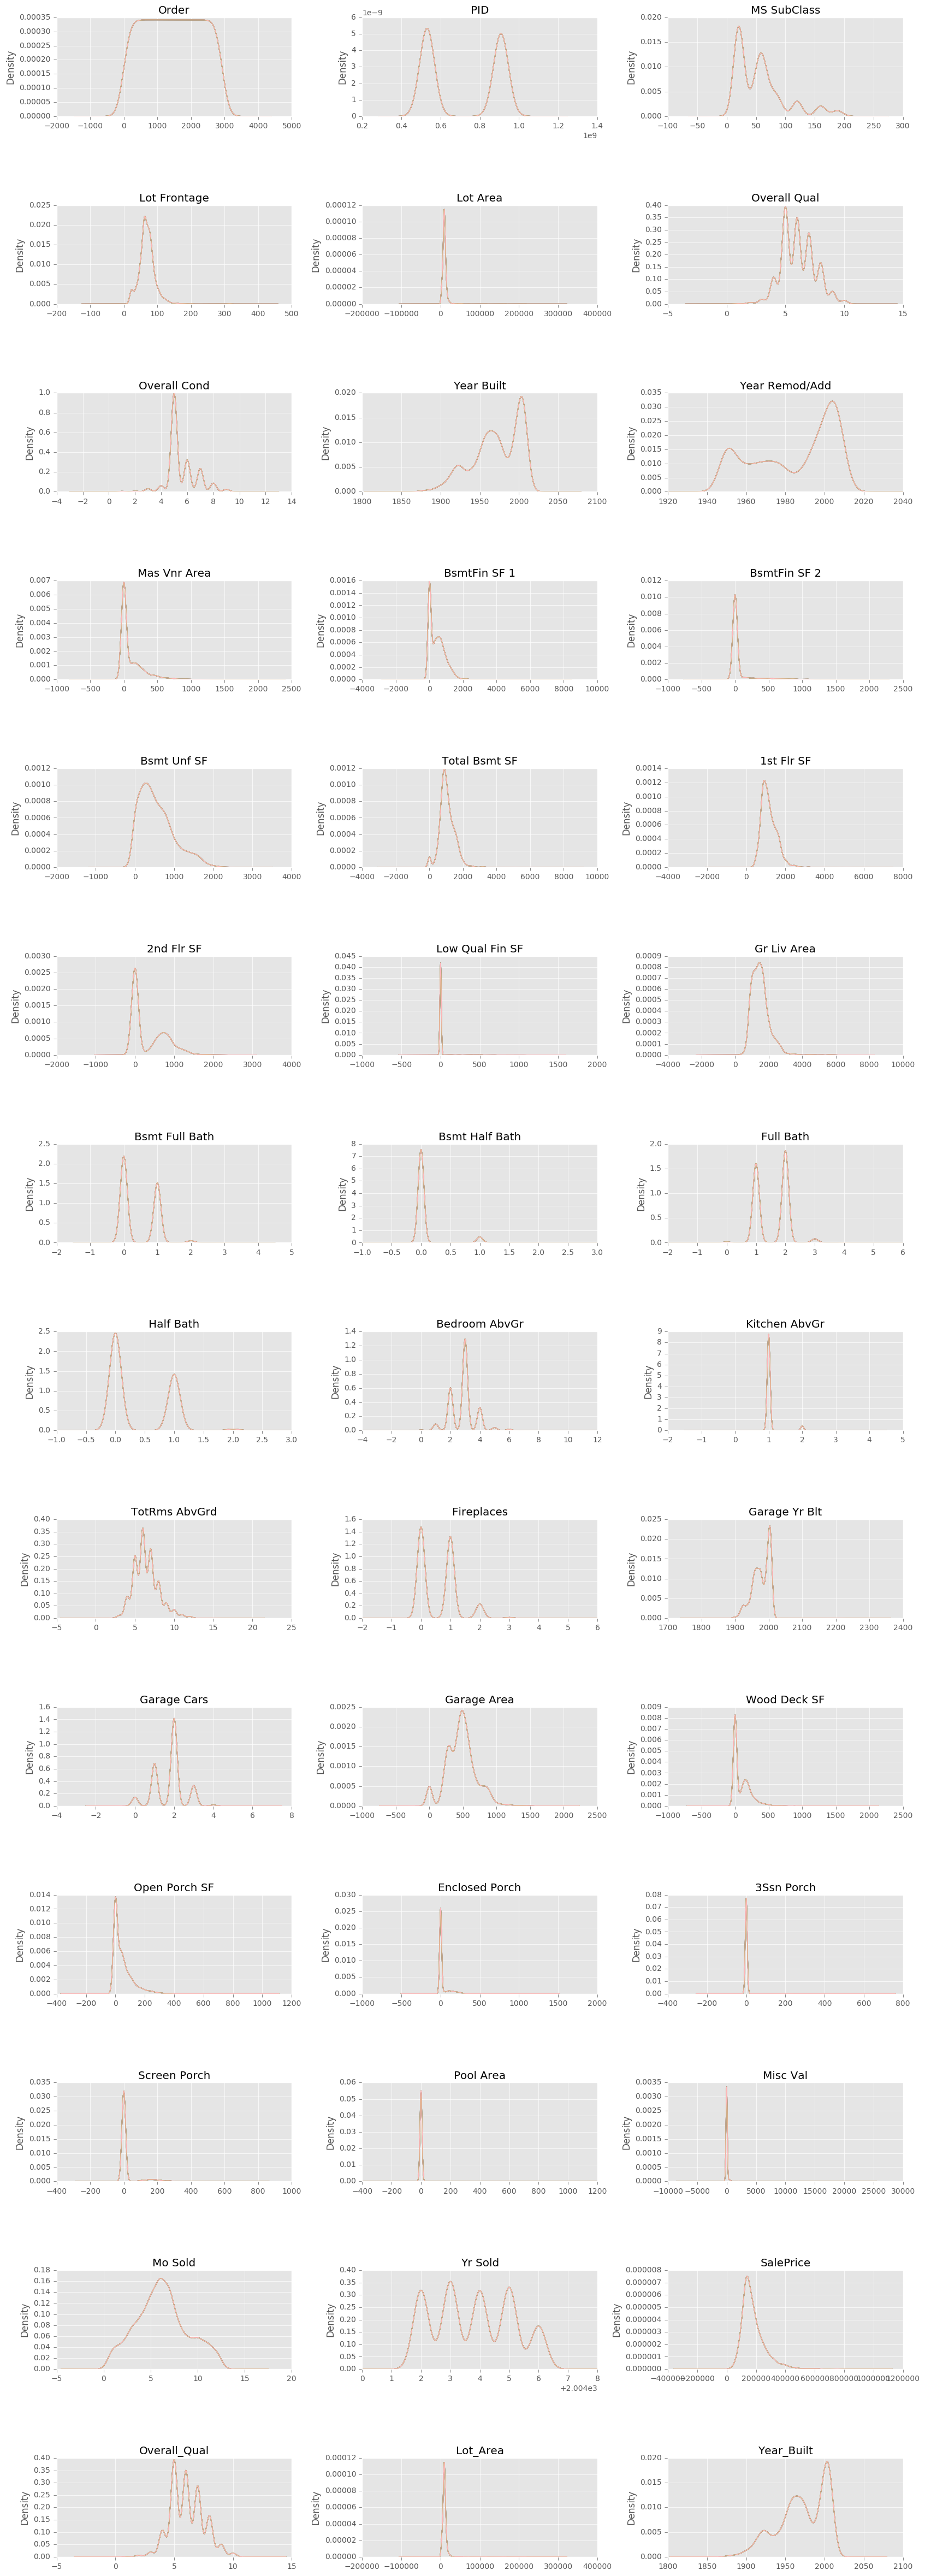

In [38]:
df.select_dtypes(include=['float64','int64'])
num_df = df.select_dtypes(include=['float64','int64'])
n_cols = 3
n_rows = len(df.select_dtypes(include=['float64','int64']).columns) / n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize = (20,60))

fig.subplots_adjust(hspace=.9, wspace=.3)

for k in axs:
    for i,j in zip(num_df, axs.flat):
        g = num_df[i].plot.kde(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()


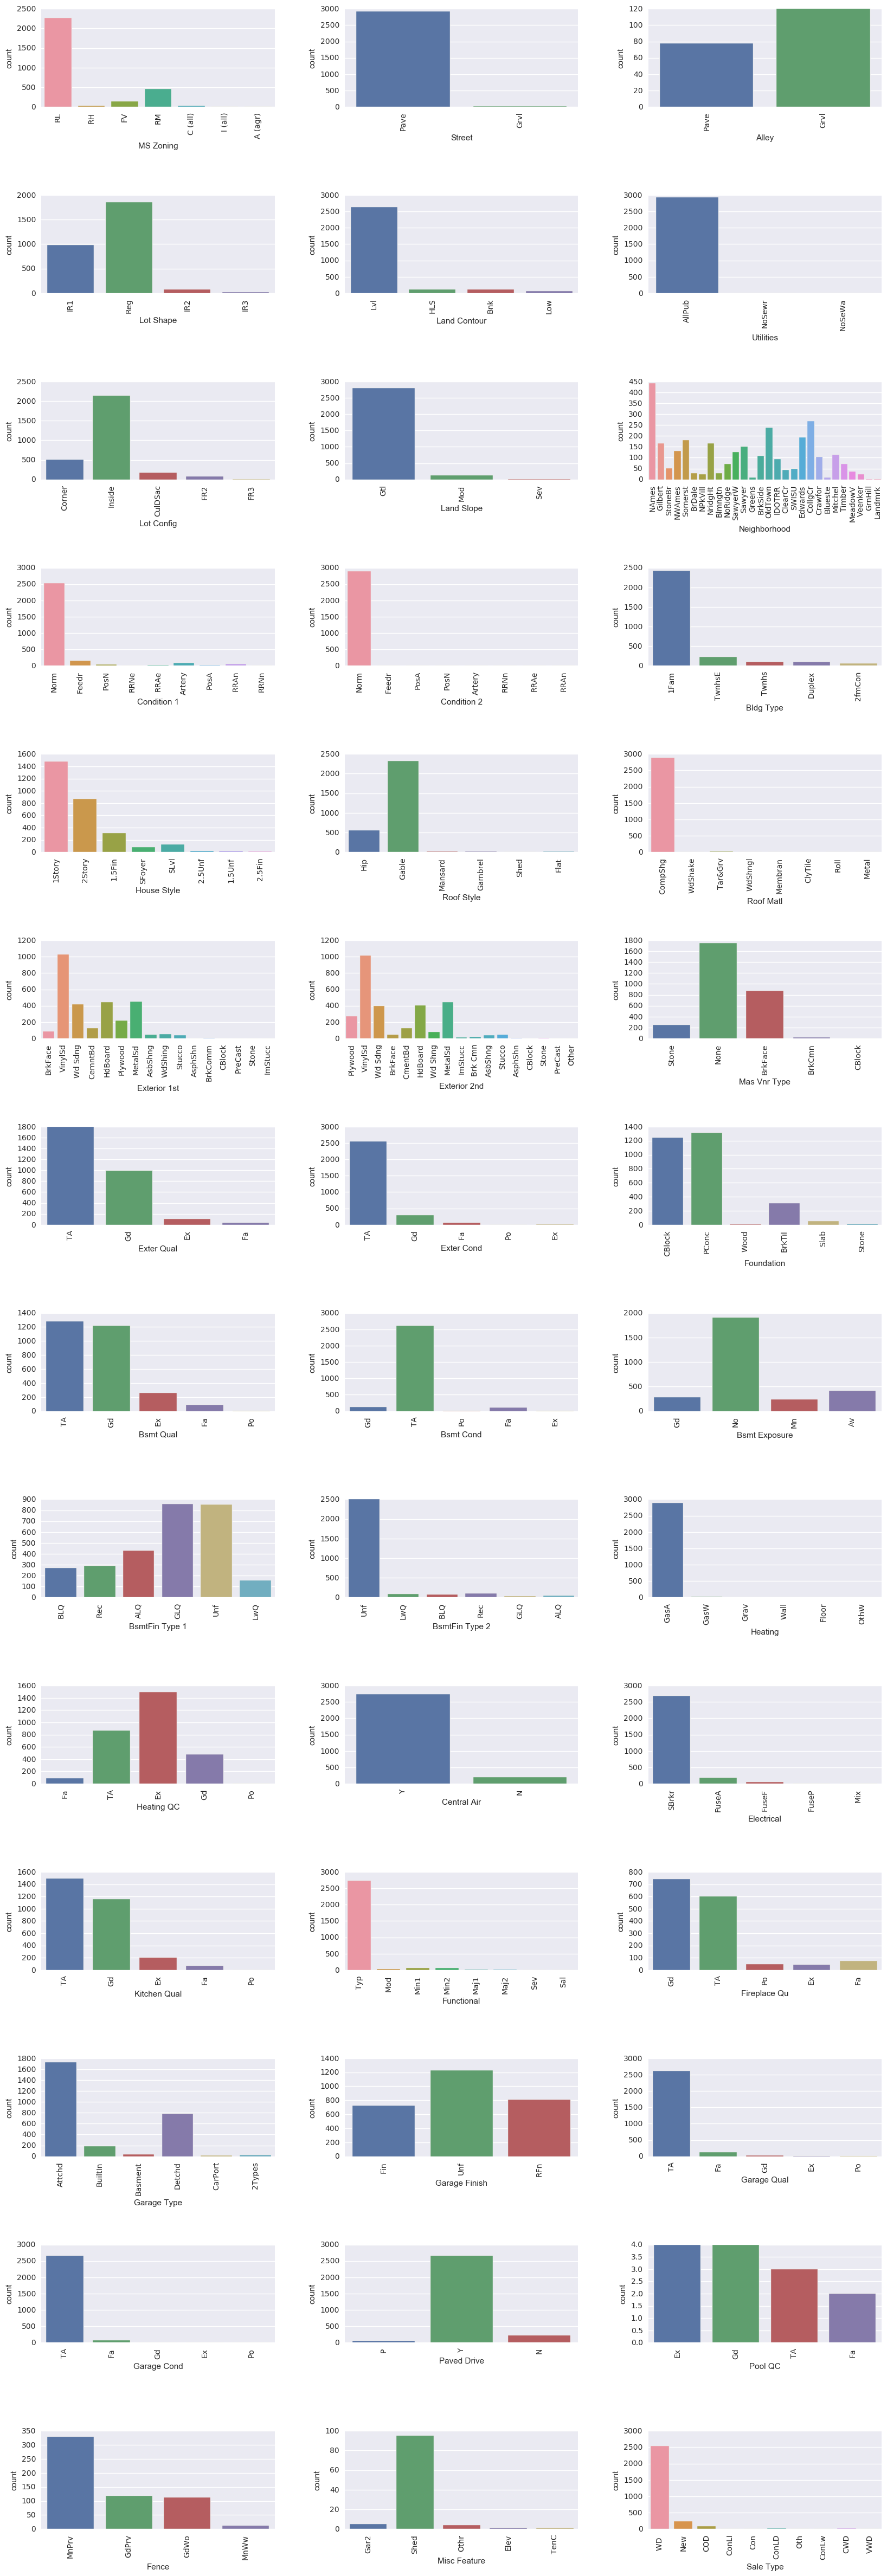

In [41]:
#object features
obj_df = df.select_dtypes(include=['object'])
n_cols = 3
n_rows = len(obj_df.columns) / n_cols

fig, axs = plt.subplots(n_rows,3, figsize = (20,60))

fig.subplots_adjust(hspace=.9, wspace=.3)

for k in axs:
    for i,j in zip(obj_df.columns, axs.flat):
        g = sns.countplot(x=i, data=obj_df, ax=j)
        plt.setp(j.get_xticklabels(), rotation=90)

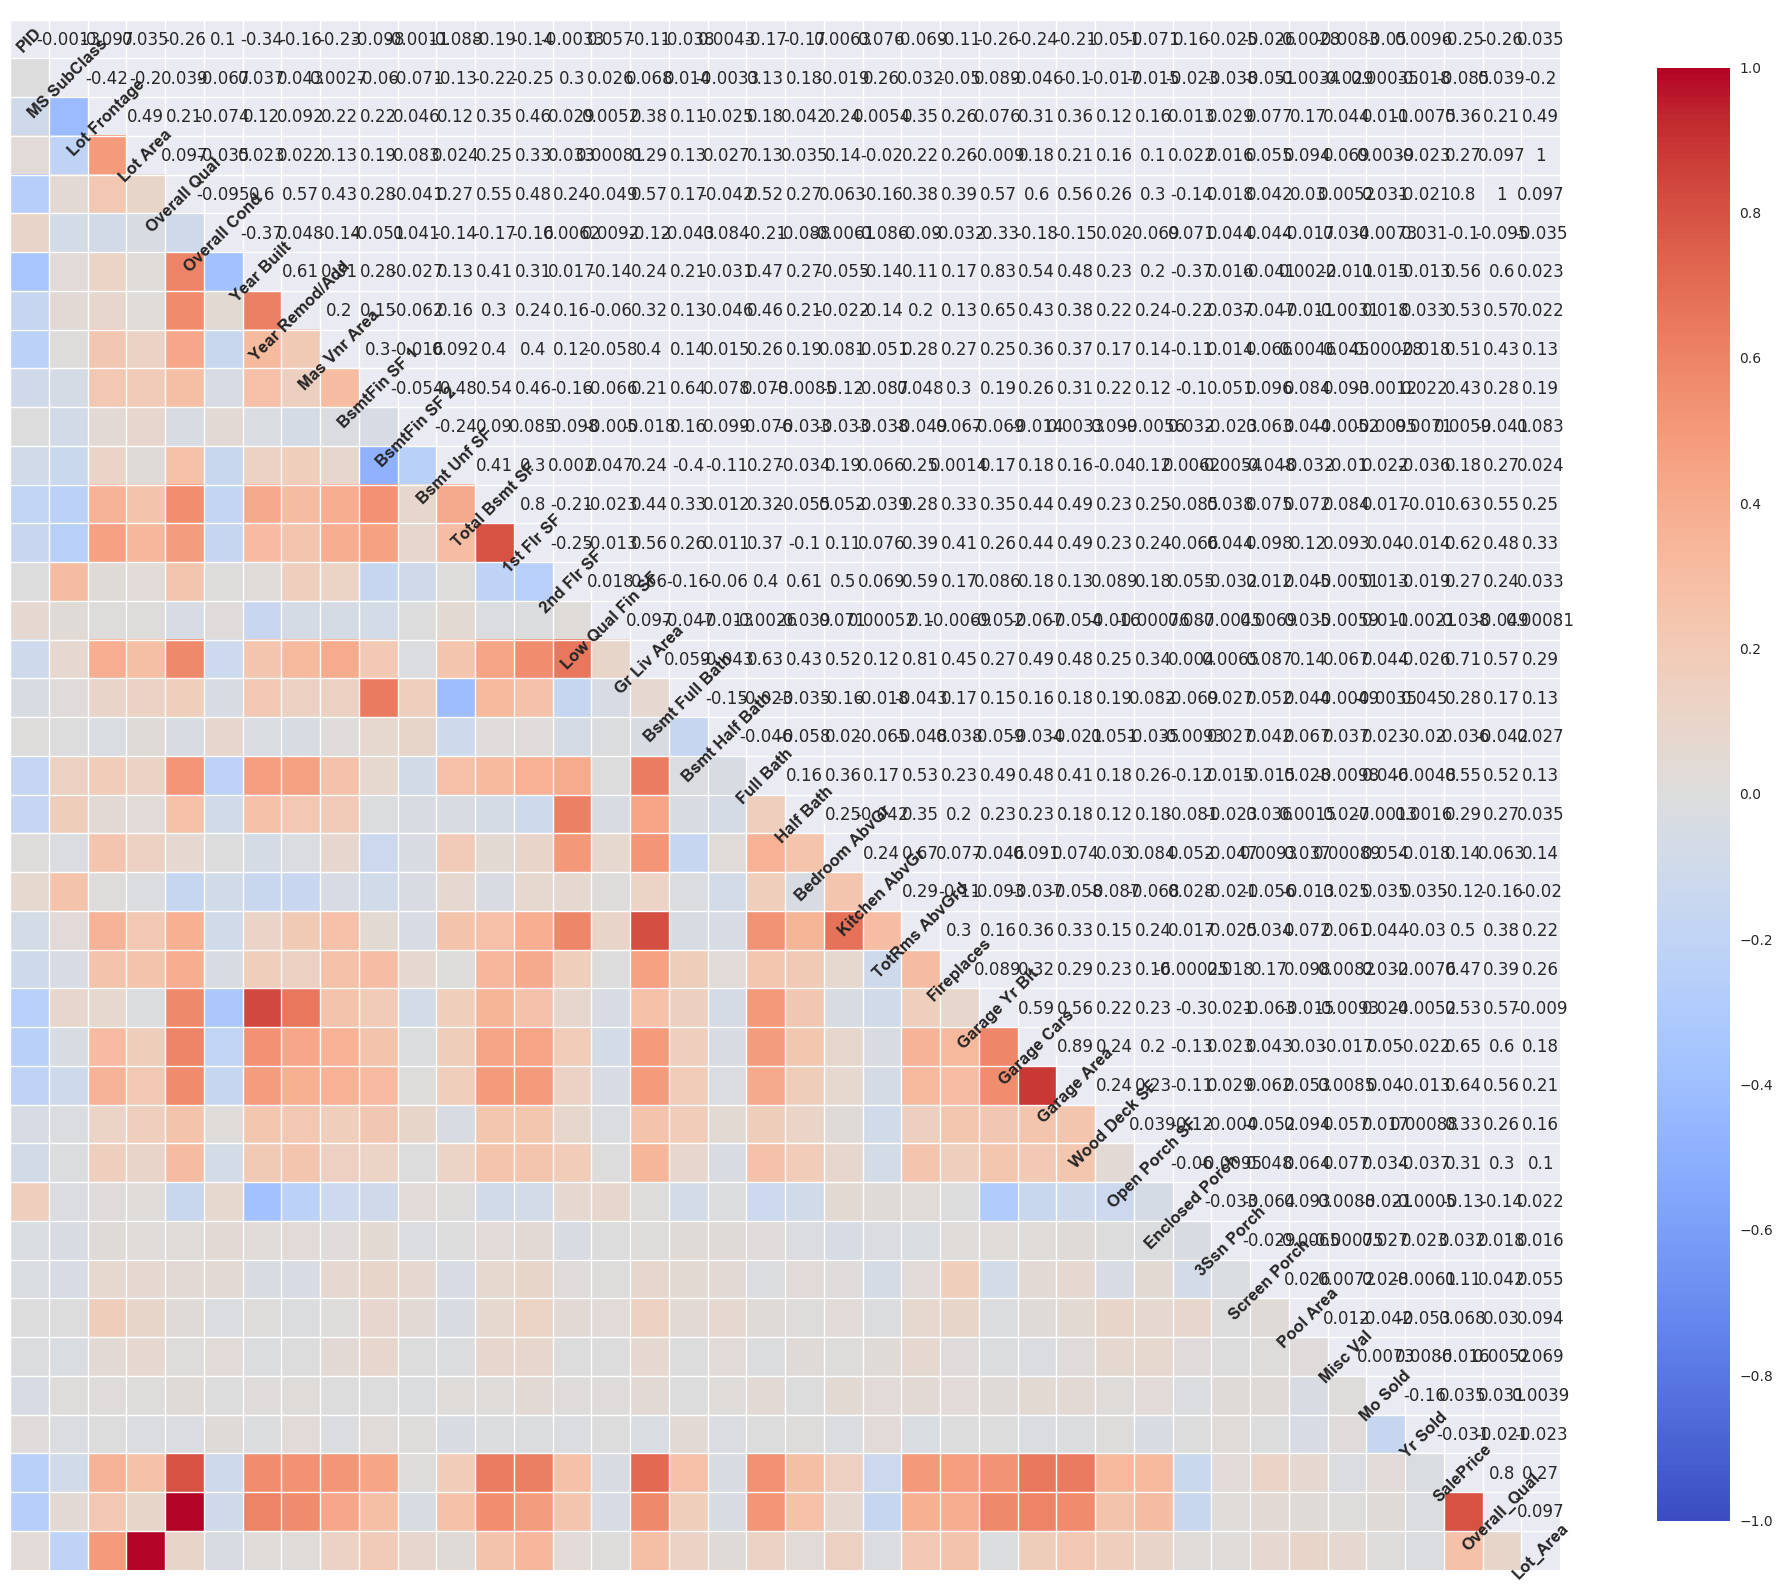

In [78]:
# plot correlation of numeric features
numeric_features = num_df.columns
fig, ax = plt.subplots(figsize=(25, 25))
sns.linearmodels.corrplot(df[numeric_features[1:-1]], ax=ax)

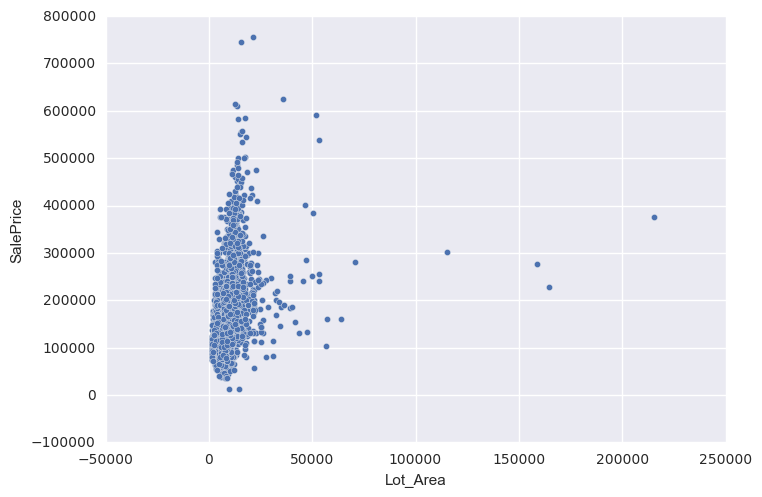

In [45]:
df.plot(kind = 'scatter', x = 'Lot_Area', y = 'SalePrice')

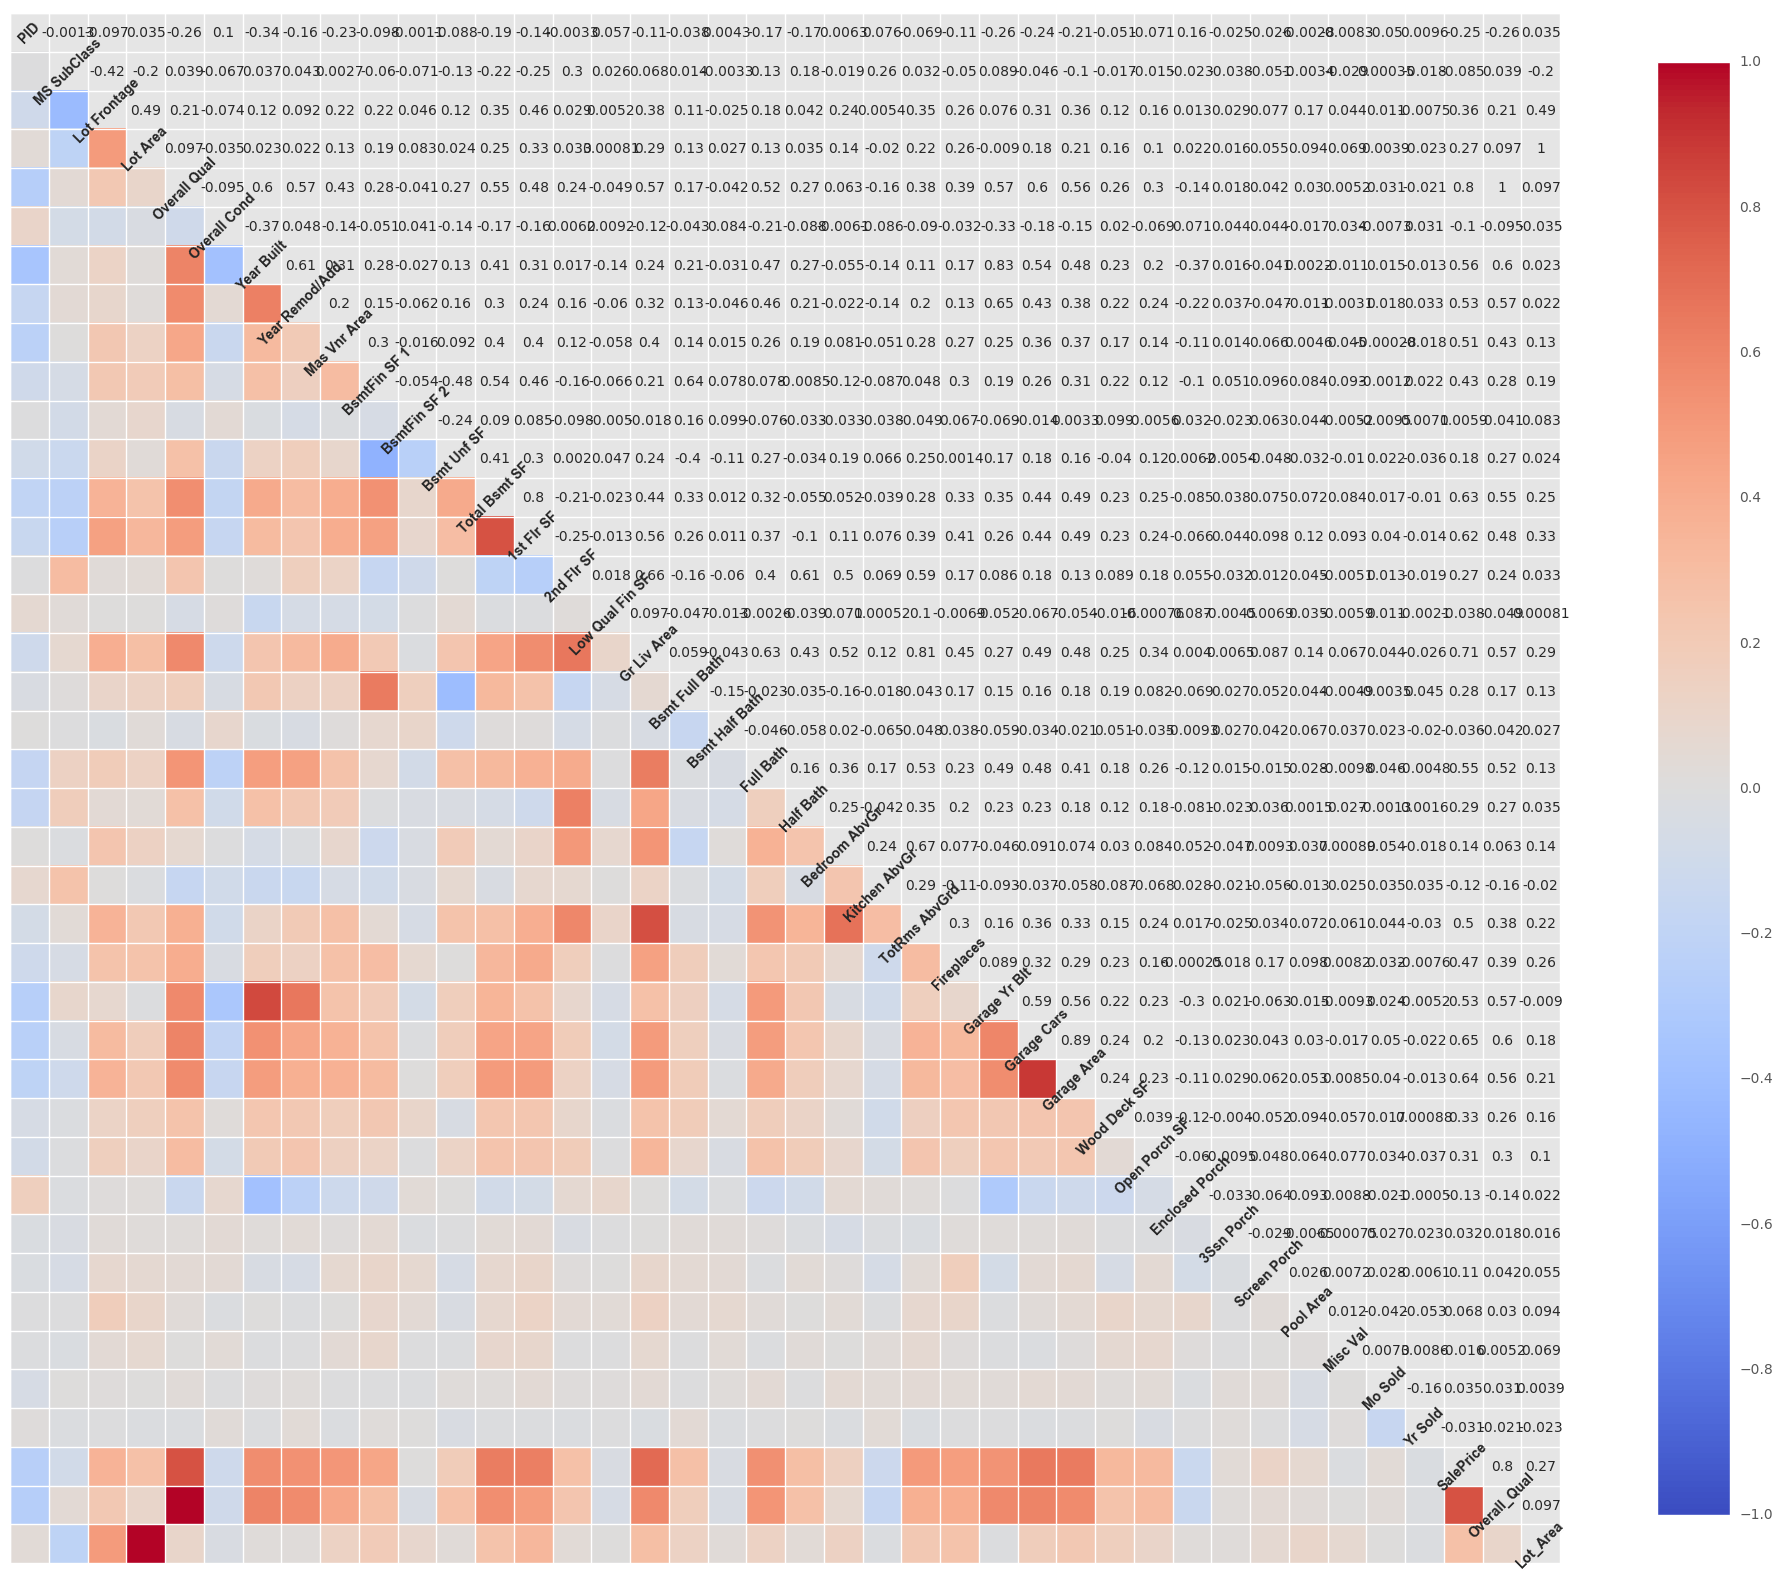

In [98]:
import seaborn as sns
# plot correlation of numeric features
numeric_features = num_df.columns
fig, ax = plt.subplots(figsize=(25, 25))
sns.linearmodels.corrplot(df[numeric_features[1:-1]], ax=ax)

In [99]:
def transform_dummy(df):
    object_columns = df.columns[df.dtypes == 'object']
    # print('Object columns: ' + str(len(object_columns)))
    object_dummies = pd.get_dummies(df[object_columns], drop_first = False)
    # print('Dummied columns: ' + str(object_dummies.shape[1]))

    # new dataframe 
    new_train_x = pd.concat([df, object_dummies], axis=1)
    nonobject_columns = new_train_x.columns[new_train_x.dtypes != "object"]
    nonobject_columns = nonobject_columns[1:] # remove pid
    # print('Total columns: ' + str(len(nonobject_columns)))
    new_train_x = new_train_x[nonobject_columns]

    return(new_train_x)

In [100]:
#remove columns which are missing lots of data
limit = .5

cleaned_cols = []
removed_cols = []

print("Train Columns with Nulls > 50%\n")
for column in df:
    nulls = df[column].isnull().sum()
    perc = float(nulls) / df.shape[0]
    if perc > limit:
        print("Removing " + column)
        removed_cols.append(column)
    else:
        cleaned_cols.append(column)
        
cleaned = df.drop(removed_cols, axis=1)
cleaned

Train Columns with Nulls > 50%

Removing Alley
Removing Pool QC
Removing Fence
Removing Misc Feature


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot_Config_Corner,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside,Garage_Area,MS_Zoning
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,528.0,RL
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,730.0,RH
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,312.0,RL
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,522.0,RL
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,482.0,RL
5,6,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,470.0,RL
6,7,527127150,120,RL,41.0,4920,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,582.0,RL
7,8,527145080,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,506.0,RL
8,9,527146030,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,608.0,RL
9,10,527162130,60,RL,60.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,442.0,RL


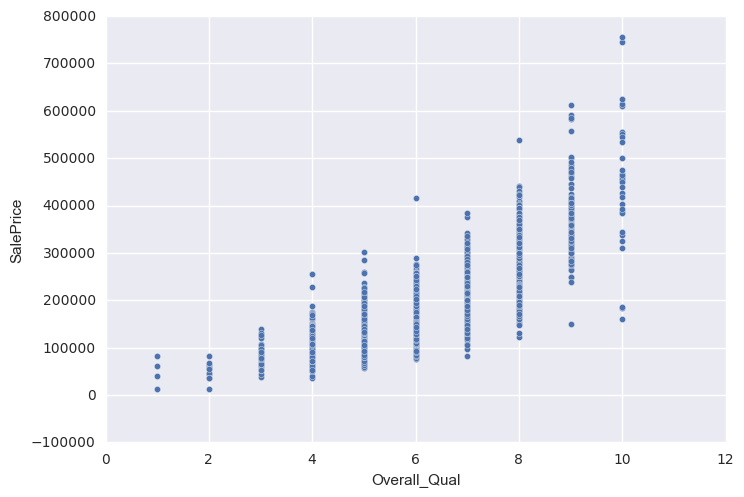

In [46]:
df.plot(kind = 'scatter', x = 'Overall_Qual', y = 'SalePrice')

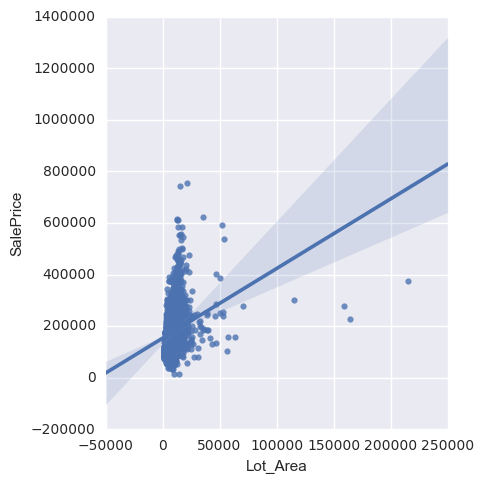

In [47]:
sns.lmplot(x = 'Lot_Area', y = 'SalePrice', data = df)

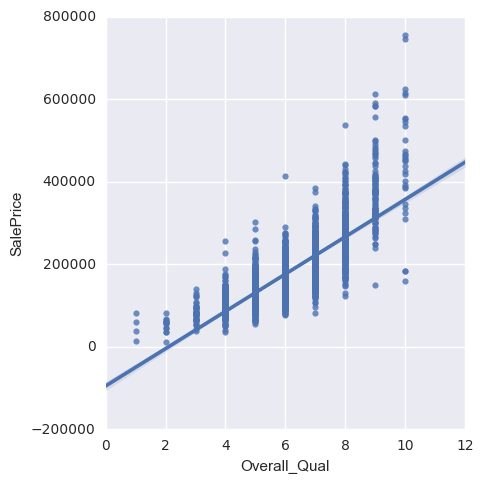

In [48]:
sns.lmplot(x = 'Overall_Qual', y = 'SalePrice', data = df)

In [50]:
model = smf.ols(formula = 'SalePrice ~ Overall_Qual', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     5179.
Date:                Thu, 09 Feb 2017   Prob (F-statistic):               0.00
Time:                        19:33:06   Log-Likelihood:                -35740.
No. Observations:                2930   AIC:                         7.148e+04
Df Residuals:                    2928   BIC:                         7.150e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -9.5e+04   3933.822    -24.150      0.000     -1.03e+05 -8.73e+04
Overall_Qual  4.525e+04    628.805     71.964      0.000       4.4e+04  4.65e+04
==============================================================================
Omnibus:                      953.364   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6610.719
Skew:                           1.362   Prob(JB):                         0.00
Kurtosis:                       9.836   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
model.resid.mean()

-2.047002518950062e-10

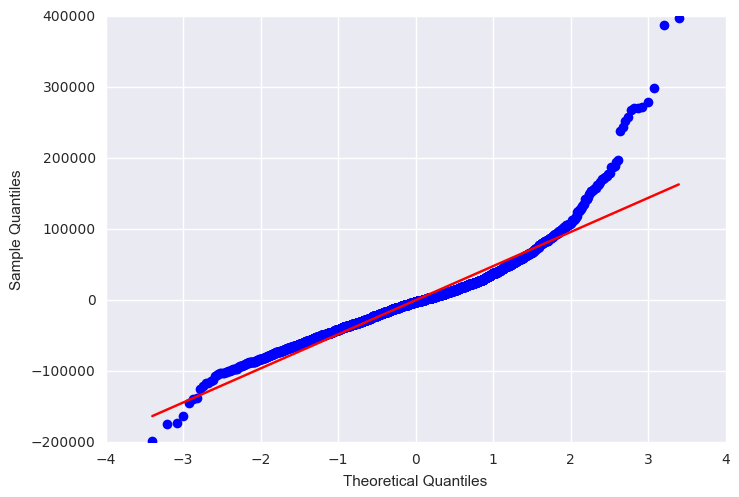

In [52]:
sm.qqplot(model.resid, line = 's')

pass

In [53]:
def transform_dummy(df):
    object_columns = df.columns[df.dtypes == 'object']
    # print('Object columns: ' + str(len(object_columns)))
    object_dummies = pd.get_dummies(df[object_columns], drop_first = False)
    # print('Dummied columns: ' + str(object_dummies.shape[1]))

    # new dataframe 
    new_train_x = pd.concat([df, object_dummies], axis=1)
    nonobject_columns = new_train_x.columns[new_train_x.dtypes != "object"]
    nonobject_columns = nonobject_columns[1:] # remove pid
    # print('Total columns: ' + str(len(nonobject_columns)))
    new_train_x = new_train_x[nonobject_columns]

    return(new_train_x)

In [64]:
### From logistic regression....

Neighborhood_df = pd.get_dummies(df.Neighborhood, prefix = 'Neighborhood')
Utilities_df = pd.get_dummies(df.Utilities, prefix = 'Utilities')
Lot_Config_df = pd.get_dummies(df.Lot_Config, prefix = 'Lot_Config')

df = df.join([Neighborhood_df, Utilities_df, Lot_Config_df])

Index([u'Order', u'PID', u'MS SubClass', u'MS Zoning', u'Lot Frontage',
       u'Lot Area', u'Street', u'Alley', u'Lot Shape', u'Land Contour',
       ...
       u'Utilities_AllPub', u'Utilities_NoSeWa', u'Utilities_NoSewr',
       u'Lot_Config_Corner', u'Lot_Config_CulDSac', u'Lot_Config_FR2',
       u'Lot_Config_FR3', u'Lot_Config_Inside', u'Garage_Area', u'MS_Zoning'],
      dtype='object', length=124)

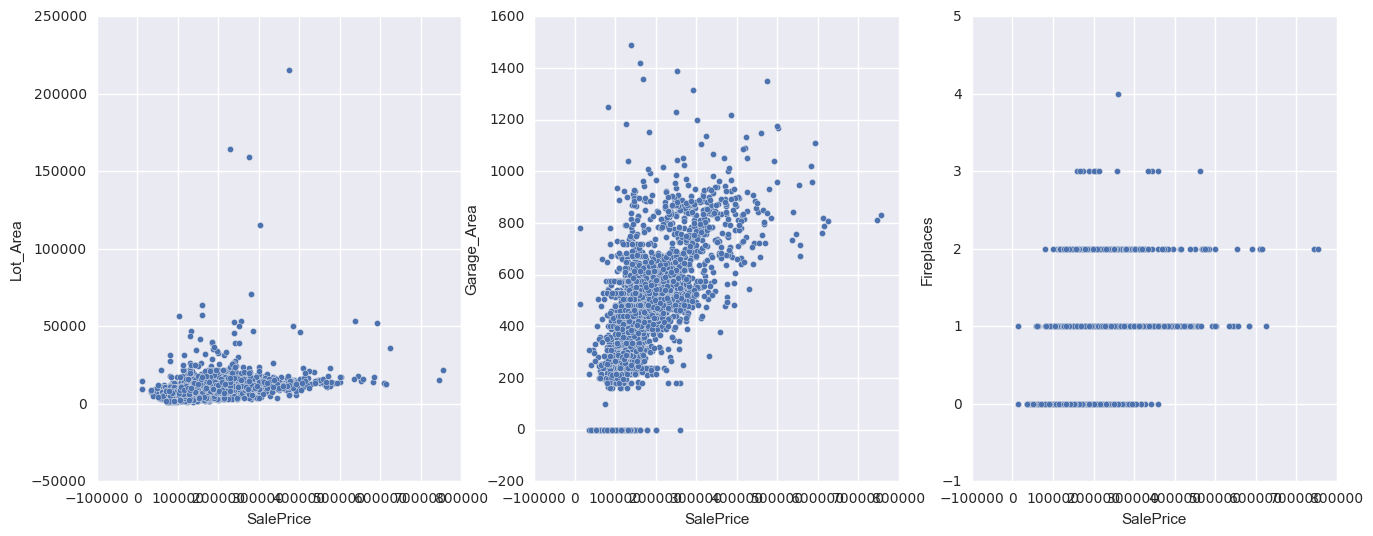

In [84]:
X = df
_, axes = plt.subplots(1, 3, figsize = (16, 6))

X.plot(kind = 'scatter', x = 'SalePrice', y = 'Lot_Area', ax = axes[0])
X.plot(kind = 'scatter', x = 'SalePrice', y = 'Garage_Area', ax = axes[1])
X.plot(kind = 'scatter', x = 'SalePrice', y = 'Fireplaces', ax = axes[2])

In [90]:
pca = decomposition.PCA().fit(X)

ValueError: could not convert string to float: RL